In [1]:
import numpy as np
import pandas as pd
import _pickle as cPickle
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
df['species']=iris.target

In [5]:
df_binary=df[df['species']!=2]
df_binary=df_binary.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)

In [6]:
df_binary

,petal length (cm),petal width (cm),species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
95,4.2,1.2,1
96,4.2,1.3,1
97,4.3,1.3,1
98,3.0,1.1,1


In [7]:
y = df_binary['species'].values
X = df_binary.iloc[:, [0,1]].values

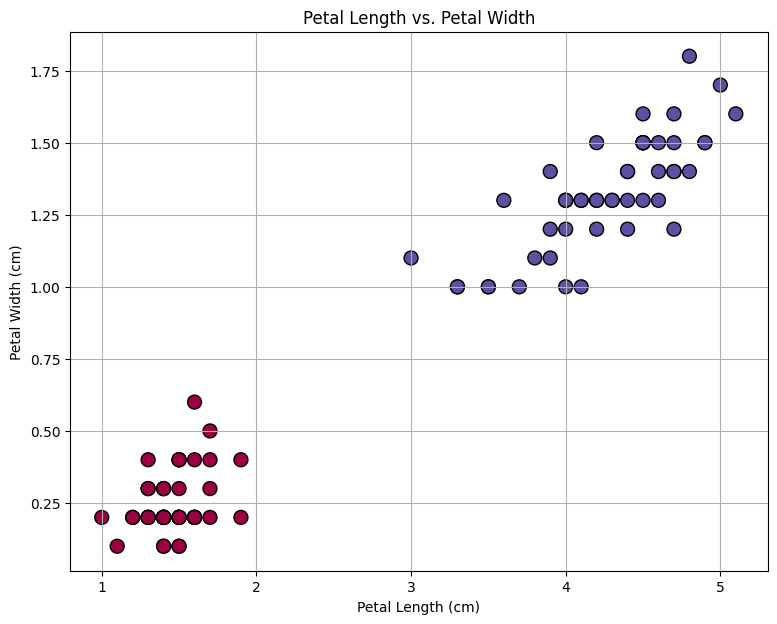

In [8]:
import matplotlib.pyplot as plt

# Plotting petal length vs. petal width
plt.figure(figsize=(9, 7))
plt.scatter(df_binary['petal length (cm)'], df_binary['petal width (cm)'], c=y, cmap='Spectral', s=100, edgecolor='k')
plt.title('Petal Length vs. Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.grid()
plt.show()

In [9]:
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

In [10]:
max = [0,0]
for i in range(5):
    
    classificador=MLP(hidden_layer_sizes=(22,), max_iter=10000, activation="tanh", 
                          learning_rate_init=0.1, tol = 1e-5, random_state=i)
    result = cross_validate(classificador, X, y, cv = KFold(n_splits=10, shuffle=True, random_state=i), 
    scoring = {"accuracy": make_scorer(accuracy_score)} , return_estimator = True)
    
    #Calculando a acurácia do teste
    accuracy =  np.mean(result['test_accuracy'])
    print("Accurácia: ",  accuracy)

    if (max[0] < accuracy):
        max[0] = accuracy
        max[1] = i
        bb = classificador
print(f"Melhor resultado: \n Acurácia: {max[0]}\n Seed: {max[1]}")

Accurácia:  1.0
Accurácia:  1.0
Accurácia:  1.0
Accurácia:  1.0
Accurácia:  1.0
Melhor resultado: 
 Acurácia: 1.0
 Seed: 0


In [11]:
bb.fit(X, y)
Predições=bb.predict(X)
print("Predictions:", Predições)
print("Labels:", y)

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


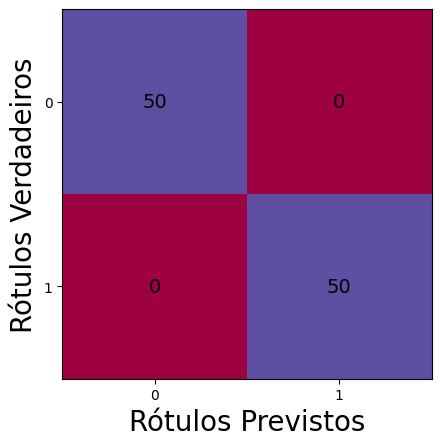

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

unique_labels = np.unique(y)
Predição = cross_val_predict(bb, X, y, cv = KFold(n_splits=10, shuffle=True, random_state=0))
conf_matrix = confusion_matrix(y, Predição, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)
disp.plot(cmap="Spectral", colorbar=False, values_format='d')
for text in disp.im_.axes.texts:
    text.set_color('black')
    text.set_fontsize(14)
plt.xlabel('Rótulos Previstos', fontsize=20)
plt.ylabel('Rótulos Verdadeiros', fontsize=20)
plt.show()

In [13]:
y = df_binary['species'].values
X = df_binary.iloc[:, [0,1]].values
bb.fit(X, y)
Predições=bb.predict(X)

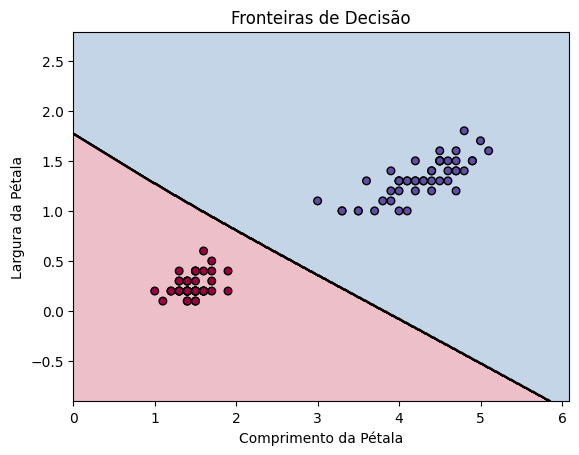

In [14]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#Definindo a escala dos gráficos com base nos valores máximos e mínimos das características da pétala 
#LARGURA (eixo Y)
#COMPRIMENTO (eixo X)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#A função np.meshgrid cria uma grade de pontos em um espaço bidimensional 
#O np.arange gera os valores no intervalo definido por xmax, xmin, ymax, ymin com o passo de 0.01
#xx e yy são matrizes que contem as coordenadas x e y de cada ponto da grade

Z = bb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#np.c_[xx.ravel(), yy.ravel()] combina as matrizes xx e yy numa matriz e coordenadas
#O classificador black box faz então previsões sobre estas coordenadas
#A variável Z contem as classes previstas para cadaa um dos pontos da grade
#Por fim, reorganizamos Z para que ele tenha a mesma forma que xx

# Plotar as fronteiras de decisão e os pontos de dados
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
contour = plt.contour(xx, yy, Z, colors='black', linewidths=1, linestyles='solid') 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="Spectral", edgecolor='k')
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão')
plt.show()

## Algoritmo Genético (Promissor)

In [15]:
import deap
from deap import base, creator, tools, algorithms
import random
import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms

In [16]:
# Função de distância (temporária)
def distance_function(x0d, x1d, discrete, continuous, class_name):
    # Função de exemplo para calcular distância
    return np.linalg.norm(np.array(list(x0d.values())) - np.array(list(x1d.values())))

In [17]:
# Converter as linhas do DataFrame (excluindo a classe) em listas de características
individuos_iniciais = df[['petal length (cm)', 'petal width (cm)']].values.tolist()
classes_iniciais = df['species'].tolist()

# Criar a classe de aptidão e o indivíduo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximização
creator.create("Individual", list, fitness=creator.FitnessMax)

In [18]:
idx=5
def create_individual():
    return individuos_iniciais[idx] + [classes_iniciais[idx]]  

In [19]:
# Função de fitness 
def fitness_sso(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
    # similar_same_outcome
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}
    
    # zero if is too similar
    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name)
    record_similarity = 0.0 if sim_ratio >= eta else sim_ratio
    
    y0 = bb.predict(np.asarray(x0).reshape(1, -1))[0]
    y1 = bb.predict(np.asarray(x1).reshape(1, -1))[0]
    target_similarity = 1.0 if y0 == y1 else 0.0
    
    evaluation = float(alpha1) * float(record_similarity) + float(alpha2) * float(target_similarity)
    return evaluation,
   
def fitness_sdo(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
    # similar_different_outcome
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}

    # zero if is too similar
    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name)
    record_similarity = 0.0 if sim_ratio >= eta else sim_ratio

    y0 = bb.predict(np.asarray(x0).reshape(1, -1))[0]
    y1 = bb.predict(np.asarray(x1).reshape(1, -1))[0]
    target_similarity = 1.0 if y0 != y1 else 0.0  

    evaluation = float(alpha1) * float(record_similarity) + float(alpha2) * target_similarity
    return evaluation,

In [20]:
#Reprodução
def cxBlendWithClass(ind1, ind2, alpha=0.5):
   
    for i, (x1, x2) in enumerate(zip(ind1[:-1], ind2[:-1])):  # Ignorar a última coluna (classe)
        gamma = (1. + 2. * alpha) * random.random() - alpha
        ind1[i] = (1. - gamma) * x1 + gamma * x2
        ind2[i] = gamma * x1 + (1. - gamma) * x2
    
    # Manter a classe original dos indivíduos sem alterar
    ind1[-1] = ind1[-1]  # A classe de ind1 permanece inalterada
    ind2[-1] = ind2[-1]  # A classe de ind2 permanece inalterada
    
    return ind1, ind2

#Mutação
def mutGaussianWithClass(individual, mu, sigma, indpb):
    # Aplica mutação apenas às características numéricas, ignorando a última posição (classe)
    for i in range(len(individual) - 1):  # Ignorar a última coluna (classe)
        if random.random() < indpb:
            individual[i] += random.gauss(mu, sigma)  # Aplica a mutação nas características numéricas
    
    return individual,  # Retorne um único indivíduo como tupla

In [21]:
#Criando indivíduos que estão próximos e resultam numa mesma classe
individuo_inicial = individuos_iniciais[idx] 
xi=individuo_inicial
def evaluate(individual):
    # Parâmetros da função de fitness (exemplo)
    alpha1 = 0.7
    alpha2 = 0.5
    eta = 0.8
    discrete = []
    continuous = ['petal length (cm)', 'petal width (cm)']
    class_name = 'species'
    idx_features = ['petal length (cm)', 'petal width (cm)']
    # Avaliar usando a função de fitness fornecida
    return fitness_sso(individual[:2], bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi)

# Configuração da toolbox
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", cxBlendWithClass, alpha=0.5)
toolbox.register("mutate", mutGaussianWithClass, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# Criar a população inicial

population = toolbox.population(n=500)
# for i, ind in enumerate(population):
#     print(f"Indivíduo {i+1}: {ind}")

# Parâmetros do algoritmo
ngen = 10  # Número de gerações
cxpb, mutpb = 0.5, 0.2  # Probabilidades de cruzamento e mutação

# Executa o algoritmo genético
result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Exibir o melhor resultado
best_individual = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo: {best_individual}, Fitness: {best_individual.fitness.values}")

# Filtrar e armazenar os novos indivíduos gerados
novos_individuos_semelhantes = [ind[:2] for ind in population]  # Pegando apenas as características

print(f"Novos indivíduos gerados: {novos_individuos_semelhantes}")

Melhor indivíduo: [1.8985035626990632, 0.424513906092833, 0], Fitness: (1.0599919572377603,)
Novos indivíduos gerados: [[1.50733196268112, 0.4777182885208421], [1.4878313583220355, 0.3904802055168587], [1.546468013929672, 0.5924947002269626], [1.5841956680576157, 0.5714393515458663], [1.8810447974496167, 0.4864056719704379], [1.7000000000000002, 0.6273265546452816], [1.4973636864419468, 0.3886238276109988], [1.6219596763468793, 0.19345900674251415], [1.896849590620933, 0.33949170342000157], [1.5862398099520647, 0.21184314390720393], [1.9051110797911142, 0.4], [1.8100056893270309, 0.582885619473239], [1.9017058234635615, 0.39583233991308325], [1.915887663202854, 0.4], [1.4643696179782384, 0.27777768665400593], [1.8882518751203732, 0.3171193971122575], [2.0934007897140443, 0.2853872146286417], [1.3374510200968928, 0.43164313781949043], [1.4197401179084688, 0.5131047812521806], [1.8785547414992352, 0.4697808382210584], [1.4905132483823436, 0.4111624068787137], [1.5160020661256461, 0.31495

In [22]:
#Criando indivíduos que estão próximos mas resultam em um classe diferente
individuo_inicial = individuos_iniciais[idx] 
xi=individuo_inicial

def evaluate(individual):
    # Parâmetros da função de fitness (exemplo)
    alpha1 = 0.7
    alpha2 = 0.5
    eta = 0.8
    discrete = []
    continuous = ['petal length (cm)', 'petal width (cm)']
    class_name = 'species'
    idx_features = ['petal length (cm)', 'petal width (cm)']
    # Avaliar usando a função de fitness fornecida
    return fitness_sdo(individual[:2], bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function,xi)

# Configuração da toolbox
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", cxBlendWithClass, alpha=0.5)
toolbox.register("mutate", mutGaussianWithClass, mu=0, sigma=1, indpb=0.7)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# Criar a população inicial
population = toolbox.population(n=500)

# Parâmetros do algoritmo
ngen = 10 # Número de gerações
cxpb, mutpb = 0.5, 0.2  # Probabilidades de cruzamento e mutação

# Executa o algoritmo genético
result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Exibir o melhor resultado
best_individual = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo: {best_individual}, Fitness: {best_individual.fitness.values}")

# Filtrar e armazenar os novos indivíduos gerados
novos_individuos_diferentes= [ind[:2] for ind in population]  # Pegando apenas as características

print(f"Novos indivíduos gerados: {novos_individuos_diferentes}")

Melhor indivíduo: [1.9038997106610158, 0.8511725232725255, 0], Fitness: (0.853424537071312,)
Novos indivíduos gerados: [[1.722778100647848, 0.9892121605144502], [1.7944436171418758, 0.9658458208386336], [2.0648632678098444, 0.8397092322174344], [1.9434398204065664, 0.8233049348939623], [0.6198984952316002, 1.1375727397038573], [1.8000270296886245, 0.9195050472243007], [2.0089803649133895, 0.7606001079279172], [1.9809316157329768, 1.059858726166696], [1.9294276106144679, 0.9198411110570547], [1.933048276890828, 0.9088857690773209], [1.9746011142033773, 0.843121352702127], [2.0635664698425558, 0.8144822142982713], [1.9468729708147623, 0.9185436299190384], [1.8711256187188625, 0.8951007004479506], [1.9561355468219195, 0.8566313547376114], [1.9846296627776128, 0.8596262138612867], [2.893710742467249, 0.3109848094304968], [2.056451049968892, 0.8177307984570028], [1.9590486755224914, 1.4329640472410918], [1.8472363168914687, 0.9349273092770223], [1.9817165340770408, 0.8398727685433954], [2.0

In [23]:
SSO=pd.DataFrame(novos_individuos_semelhantes)
SDO=pd.DataFrame(novos_individuos_diferentes)
print(SSO.head())
print(SDO.head())

          0         1
0  1.507332  0.477718
1  1.487831  0.390480
2  1.546468  0.592495
3  1.584196  0.571439
4  1.881045  0.486406
          0         1
0  1.722778  0.989212
1  1.794444  0.965846
2  2.064863  0.839709
3  1.943440  0.823305
4  0.619898  1.137573


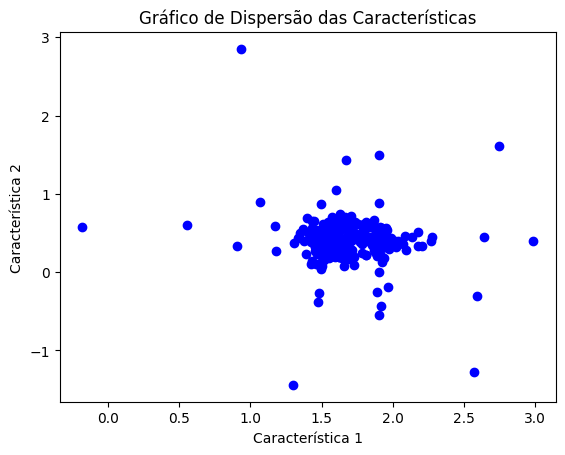

In [24]:
import matplotlib.pyplot as plt

plt.scatter(SSO[0], SSO[1], c='b')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersão das Características')
plt.show()

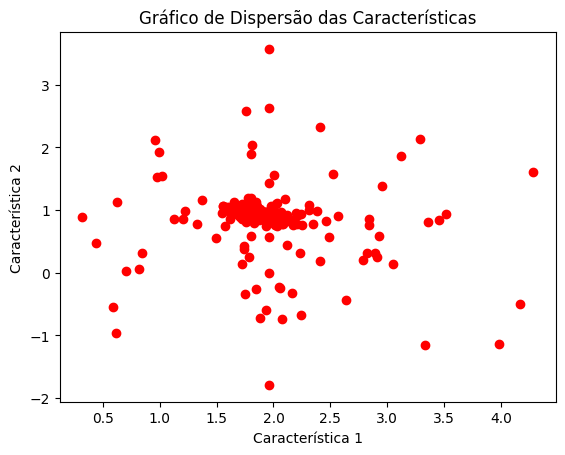

In [25]:
import matplotlib.pyplot as plt

plt.scatter(SDO[0], SDO[1], c='r')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersão das Características')
plt.show()

In [26]:
print(xi)

[1.7, 0.4]


In [27]:
XSSO=SSO.iloc[:,[0,1]].values
XSDO=SDO.iloc[:,[0,1]].values
#print(XSSO)
#print(XSDO)

In [28]:
XTOTAL = np.vstack((XSSO, XSDO))
#print(XTOTAL)

In [29]:
ytotal= bb.predict(XTOTAL)
ytotal

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
from sklearn.tree import DecisionTreeClassifier
ClassificadorDT = DecisionTreeClassifier(max_depth=15, random_state=42)
ClassificadorDT.fit(XTOTAL, ytotal)

DecisionTreeClassifier(max_depth=15, random_state=42)

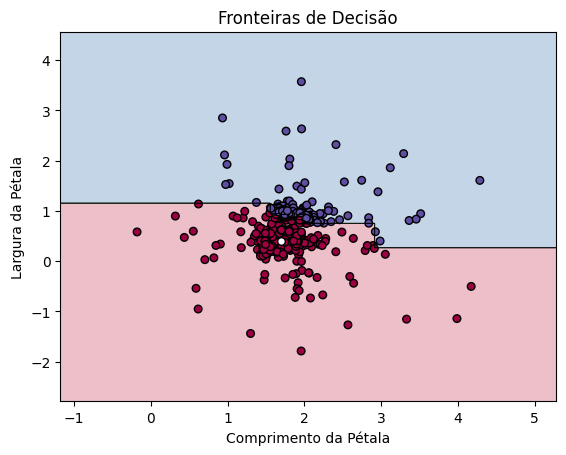

In [31]:
x_min, x_max = XTOTAL[:, 0].min() - 1, XTOTAL[:, 0].max() + 1
y_min, y_max = XTOTAL[:, 1].min() - 1, XTOTAL[:, 1].max() + 1

#Definindo a escala dos gráficos com base nos valores máximos e mínimos das características da pétala 
#LARGURA (eixo Y)
#COMPRIMENTO (eixo X)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#A função np.meshgrid cria uma grade de pontos em um espaço bidimensional 
#O np.arange gera os valores no intervalo definido por xmax, xmin, ymax, ymin com o passo de 0.01
#xx e yy são matrizes que contem as coordenadas x e y de cada ponto da grade

Z = ClassificadorDT.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#np.c_[xx.ravel(), yy.ravel()] combina as matrizes xx e yy numa matriz e coordenadas
#O classificador black box faz então previsões sobre estas coordenadas
#A variável Z contem as classes previstas para cadaa um dos pontos da grade
#Por fim, reorganizamos Z para que ele tenha a mesma forma que xx

# Plotar as fronteiras de decisão e os pontos de dados
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
contour = plt.contour(xx, yy, Z, colors='black', linewidths=0.2, linestyles='solid') 
plt.scatter(XTOTAL[:, 0], XTOTAL[:, 1], c=ytotal, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(xi[0], xi[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão')
plt.show()

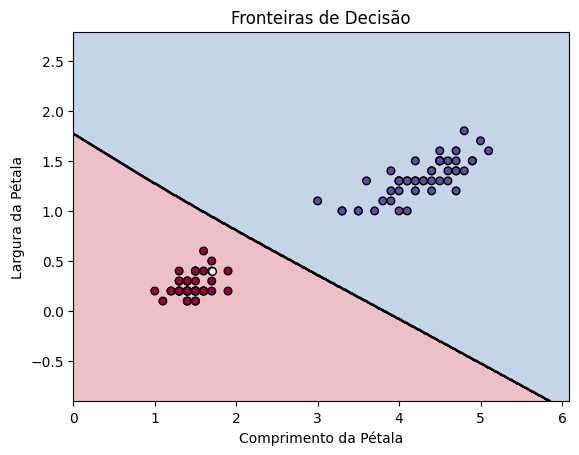

In [32]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#Definindo a escala dos gráficos com base nos valores máximos e mínimos das características da pétala 
#LARGURA (eixo Y)
#COMPRIMENTO (eixo X)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#A função np.meshgrid cria uma grade de pontos em um espaço bidimensional 
#O np.arange gera os valores no intervalo definido por xmax, xmin, ymax, ymin com o passo de 0.01
#xx e yy são matrizes que contem as coordenadas x e y de cada ponto da grade

Z = bb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#np.c_[xx.ravel(), yy.ravel()] combina as matrizes xx e yy numa matriz e coordenadas
#O classificador black box faz então previsões sobre estas coordenadas
#A variável Z contem as classes previstas para cadaa um dos pontos da grade
#Por fim, reorganizamos Z para que ele tenha a mesma forma que xx

# Plotar as fronteiras de decisão e os pontos de dados
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
contour = plt.contour(xx, yy, Z, colors='black', linewidths=1, linestyles='solid') 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(xi[0], xi[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão')
plt.show()

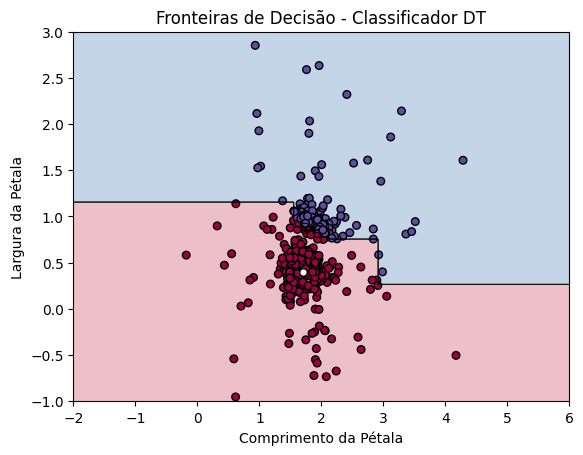

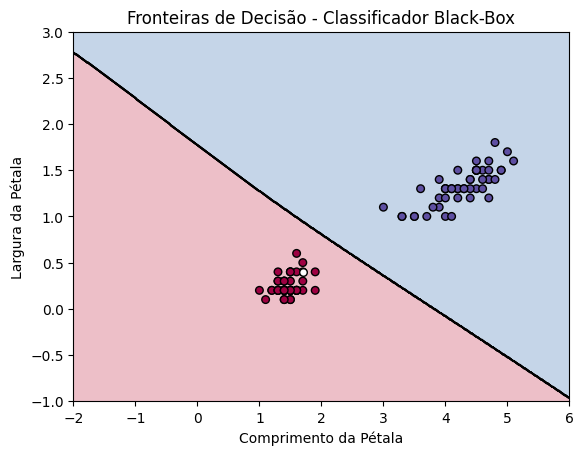

In [33]:
# Definir os limites manualmente
x_min = -2  # Substitua pelo limite desejado para o eixo X
x_max = 6   # Substitua pelo limite desejado para o eixo X
y_min = -1  # Substitua pelo limite desejado para o eixo Y
y_max = 3   # Substitua pelo limite desejado para o eixo Y

# Criar a grade de pontos com os valores fixos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Gráfico 1
Z = ClassificadorDT.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
plt.contour(xx, yy, Z, colors='black', linewidths=0.2, linestyles='solid')
plt.scatter(XTOTAL[:, 0], XTOTAL[:, 1], c=ytotal, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(xi[0], xi[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão - Classificador DT')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# Gráfico 2
Z = bb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
plt.contour(xx, yy, Z, colors='black', linewidths=1, linestyles='solid')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(xi[0], xi[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão - Classificador Black-Box')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

## FINALMENTE
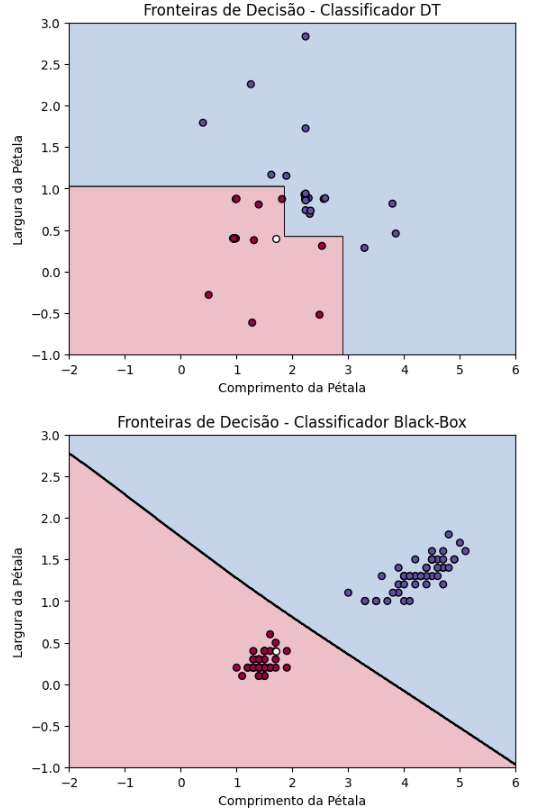  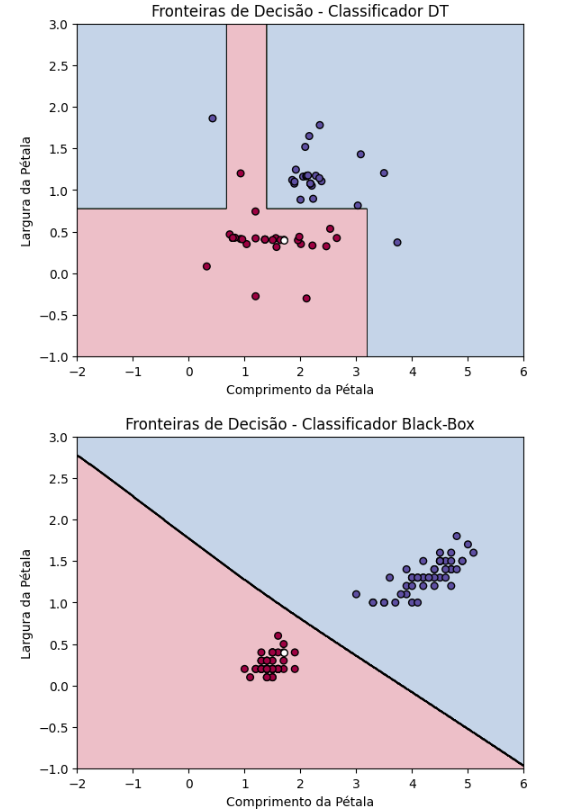

# alpha1 = 0.7
# alpha2 = 0.5
# eta = 0.3
# population = toolbox.population(n=30)
# ngen = 10  
# cxpb, mutpb = 0.5, 0.2
# toolbox.register("mate", cxBlendWithClass, alpha=0.5)
# toolbox.register("mutate", mutGaussianWithClass, mu=0, sigma=1, indpb=0.2)
# toolbox.register("select", tools.selTournament, tournsize=3)

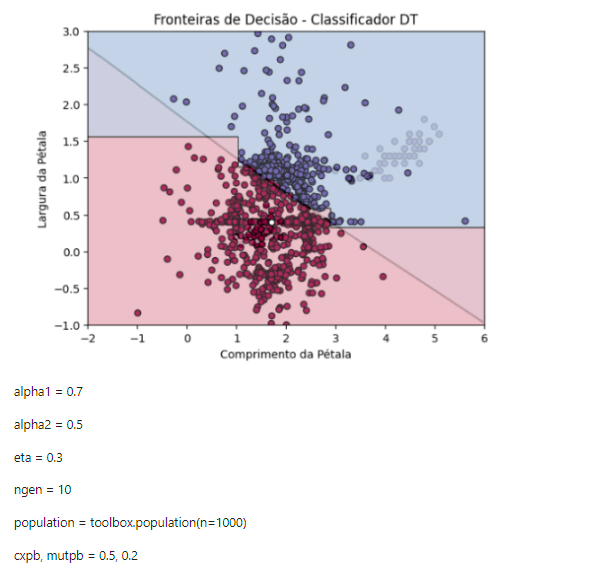

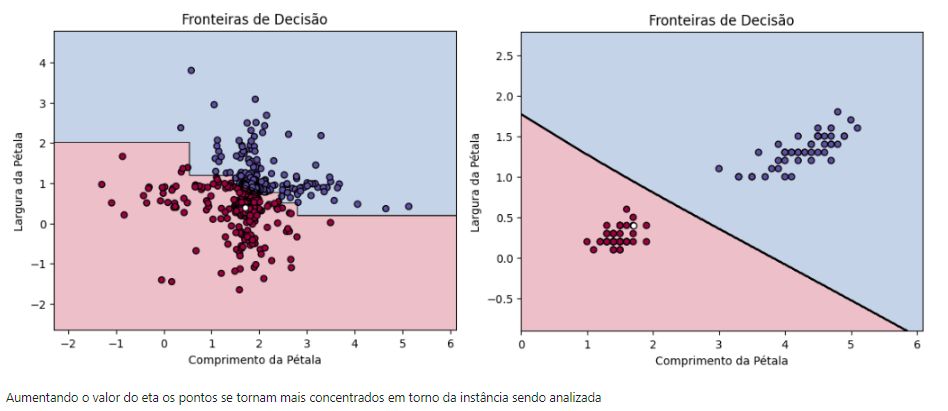

## Não está muito bom para gerar os dados azuis 
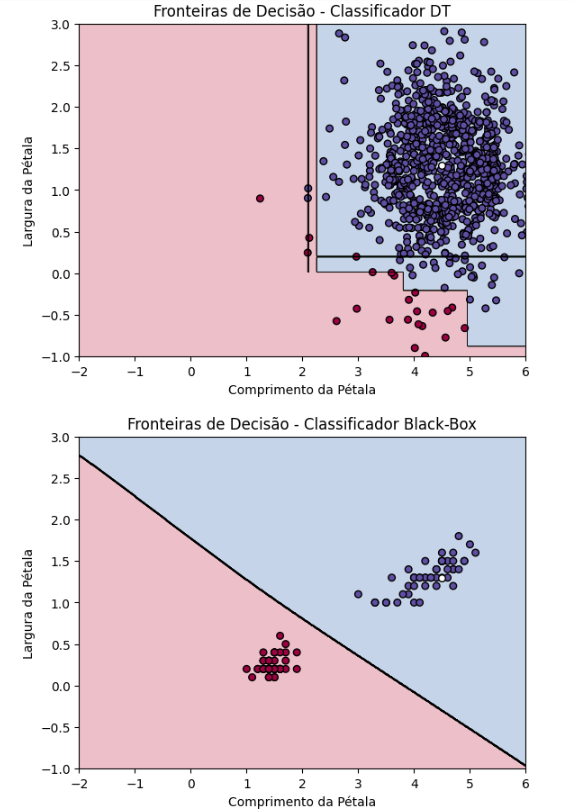

provavelmente devido à distância

# Funcionamento da função de distância NSED
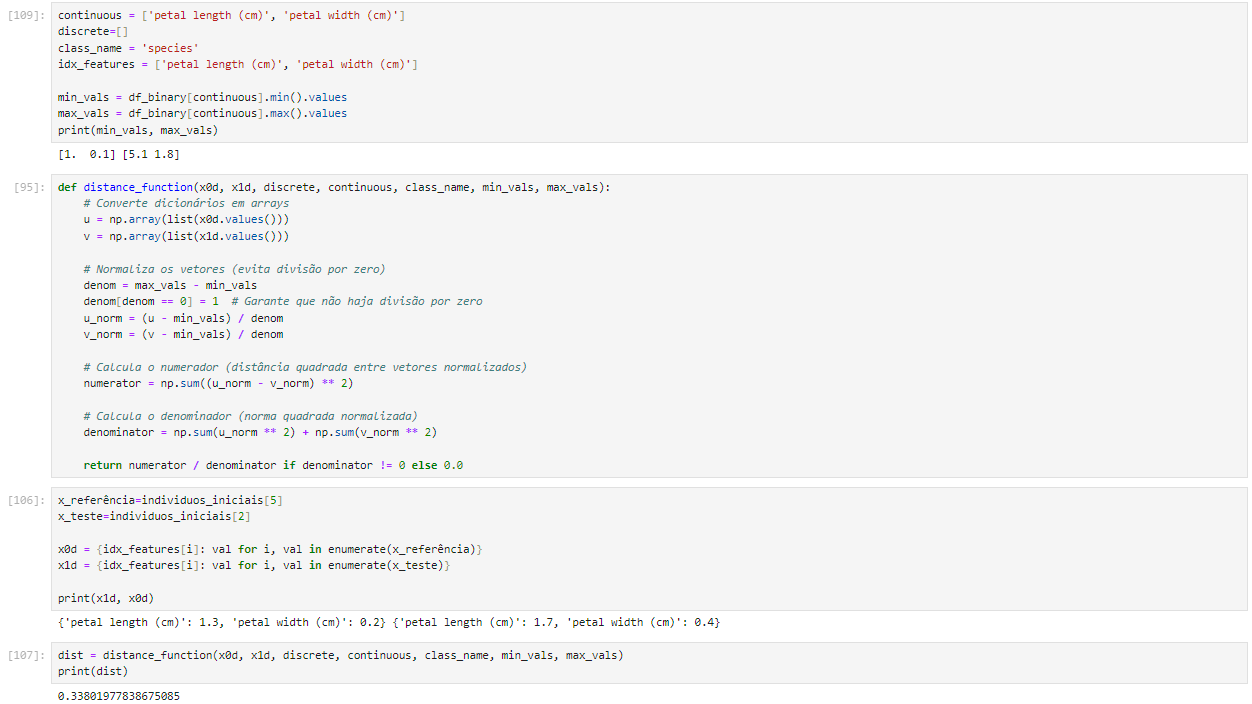